# <center> K-Means Clustering: Airline Customer Value Analysis </center>

In [2]:
# import library

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


In [3]:
# Matplotlib Default Parameter

from matplotlib import rcParams
plt.style.use('fivethirtyeight')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

## Load Dataset

In [4]:
# Importing the data
df = pd.read_csv("C:/Users/Nisha Preetha M/DS-Projects/flight_train.csv")
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [5]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
51724,28429,5/15/2010,11/30/2010,Male,4,dongguanshi,guangdong,CN,47.0,3/31/2014,...,1408.0,5058,1/20/2014,72,146.333333,356,0,0.492289,1496,0
30957,57544,3/20/2009,3/20/2009,Male,4,NaN,beijing,CN,41.0,3/31/2014,...,2981.0,12759,3/26/2014,6,143.800000,436,0,0.561048,4330,0
17353,32879,2/20/2012,3/5/2012,Male,4,wuhan,hubei,CN,58.0,3/31/2014,...,7671.0,15753,2/27/2014,34,48.846154,235,0,0.892182,12747,0
48056,7933,7/11/2012,7/16/2012,Female,4,benxi,liaoning,CN,19.0,3/31/2014,...,0.0,5870,7/25/2012,616,9.000000,9,0,0.525000,2138,0
8302,581,1/28/2006,1/28/2006,Male,4,guangzhou,guangdong,CN,46.0,3/31/2014,...,7870.0,37284,3/8/2014,24,21.562500,84,0,0.669089,17211,1


In [6]:
# Check the number of features and rows

print('Total Rows :', df.shape[0])
print('Total Features :', df.shape[1])

Total Rows : 55000
Total Features : 23


# Exploratory Data Analysis (EDA)

## 1. Descriptive Analysis

### a. Check Dtype

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          55000 non-null  int64  
 1   FFP_DATE           55000 non-null  object 
 2   FIRST_FLIGHT_DATE  55000 non-null  object 
 3   GENDER             54997 non-null  object 
 4   FFP_TIER           55000 non-null  int64  
 5   WORK_CITY          53034 non-null  object 
 6   WORK_PROVINCE      52216 non-null  object 
 7   WORK_COUNTRY       54980 non-null  object 
 8   AGE                54658 non-null  float64
 9   LOAD_TIME          55000 non-null  object 
 10  FLIGHT_COUNT       55000 non-null  int64  
 11  BP_SUM             55000 non-null  int64  
 12  SUM_YR_1           54738 non-null  float64
 13  SUM_YR_2           54937 non-null  float64
 14  SEG_KM_SUM         55000 non-null  int64  
 15  LAST_FLIGHT_DATE   55000 non-null  object 
 16  LAST_TO_END        550

In [8]:
# Grouping Features Based on Their Data Type

nums = df.select_dtypes(include=[np.number], exclude=[bool]).columns
cats = df.select_dtypes(exclude=[np.number]).columns


#### Numeric

In [9]:
# statistical summary of numeric features

df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,55000.0,31549.707145,18177.005101,1.000000,15798.750000,31559.500000,47322.250000,62988.0
FFP_TIER,55000.0,4.115727,0.395579,4.000000,4.000000,4.000000,4.000000,6.0
AGE,54658.0,42.705789,9.803796,6.000000,35.000000,42.000000,48.000000,110.0
FLIGHT_COUNT,55000.0,13.213527,14.528764,2.000000,4.000000,8.000000,16.000000,213.0
BP_SUM,55000.0,12362.465164,17012.468908,0.000000,3497.000000,6903.000000,14481.000000,505308.0
SUM_YR_1,54738.0,6002.575145,8458.072660,0.000000,1400.000000,3426.500000,7406.000000,239560.0
SUM_YR_2,54937.0,6325.644993,9080.805391,0.000000,1300.000000,3484.000000,7760.000000,234188.0
SEG_KM_SUM,55000.0,19256.688255,21613.796416,1380.000000,6332.000000,11983.000000,23761.500000,580717.0
LAST_TO_END,55000.0,155.593436,169.987954,1.000000,25.000000,91.000000,226.000000,730.0
AVG_INTERVAL,55000.0,62.979631,64.506386,0.000000,25.166667,44.600000,77.500000,714.0


Extreme value of  `age` (110) doesnt make sense.

#### Categorical

In [10]:
# statistical summary of categorical features

df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,55000,55000,54997,53034,52216,54980,55000,55000
unique,3067,3395,2,2956,1061,110,1,729
top,1/13/2011,9/9/2005,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,140,76,42504,8348,15388,50413,55000,929


In [11]:
# See the number of unique values

df[cats].nunique()

FFP_DATE             3067
FIRST_FLIGHT_DATE    3395
GENDER                  2
WORK_CITY            2956
WORK_PROVINCE        1061
WORK_COUNTRY          110
LOAD_TIME               1
LAST_FLIGHT_DATE      729
dtype: int64

In [12]:
df[cats].dtypes

FFP_DATE             object
FIRST_FLIGHT_DATE    object
GENDER               object
WORK_CITY            object
WORK_PROVINCE        object
WORK_COUNTRY         object
LOAD_TIME            object
LAST_FLIGHT_DATE     object
dtype: object

`FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME` dan `LAST_FLIGHT_DATE` will be converted to date type.

### b. Missing values

In [13]:
# check missing value

df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            1966
WORK_PROVINCE        2784
WORK_COUNTRY           20
AGE                   342
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              262
SUM_YR_2               63
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

There are several columns with null values: `GENDER`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `SUM_YR_1`, and `SUM_YR_2`.

### c. Check Duplicated Rows

In [14]:
df.duplicated().any()

False

In [15]:
df.duplicated().sum()

0

There are no duplicated columns

### d. Summary 

In [16]:
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [17]:
# Create summry data Info
list = []

for col in df.columns:
    list.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique()])
df_summary = pd.DataFrame(data=list, columns=['feature', 'data_type', 'null_num','%null','nunique'])
df_summary

,feature,data_type,null_num,%null,nunique
0,MEMBER_NO,int64,0,0.000000,55000
1,FFP_DATE,object,0,0.000000,3067
2,FIRST_FLIGHT_DATE,object,0,0.000000,3395
3,GENDER,object,3,0.005455,2
4,FFP_TIER,int64,0,0.000000,3
5,WORK_CITY,object,1966,3.574545,2956
6,WORK_PROVINCE,object,2784,5.061818,1061
7,WORK_COUNTRY,object,20,0.036364,110
8,AGE,float64,342,0.621818,83
9,LOAD_TIME,object,0,0.000000,1


## 2. Univariate Analysis

###  1. Boxplot and Violinplot

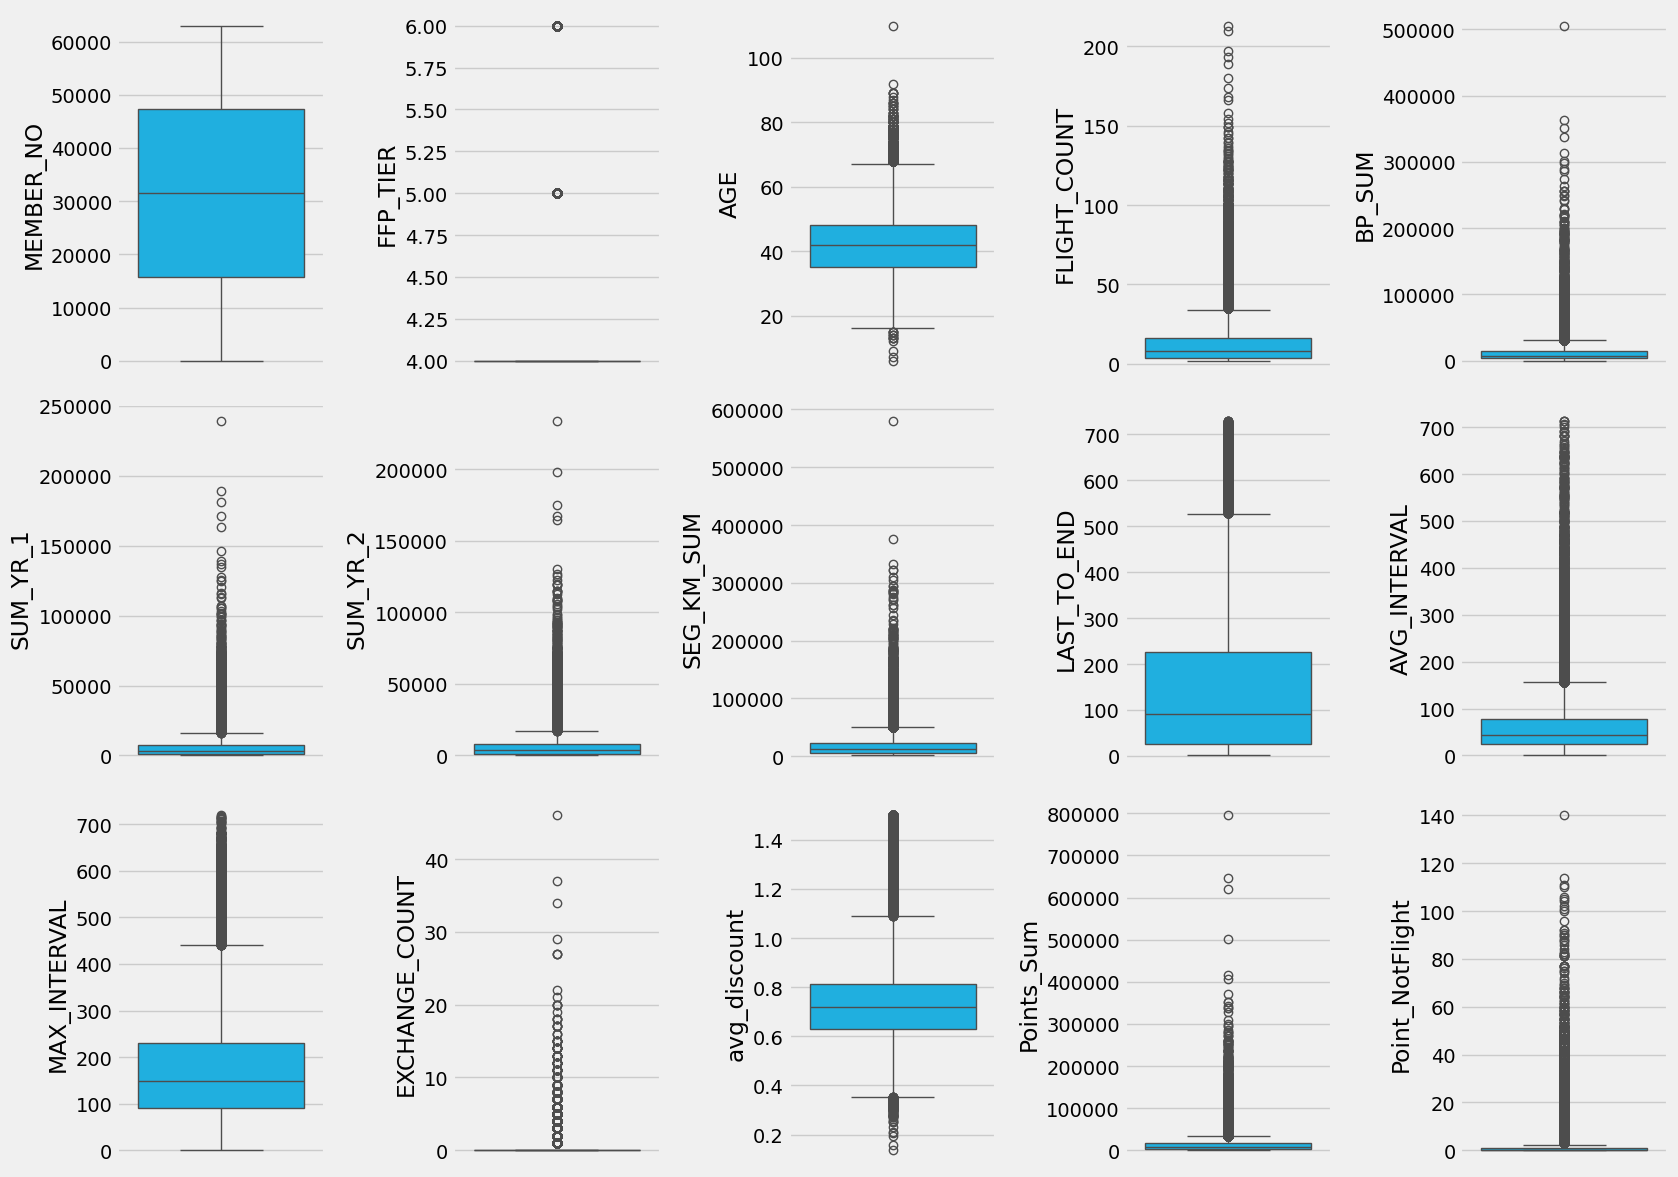

In [18]:
plt.figure(figsize = (17,12))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y = df[nums[i]], orient='v', color = 'deepskyblue')
    plt.tight_layout()

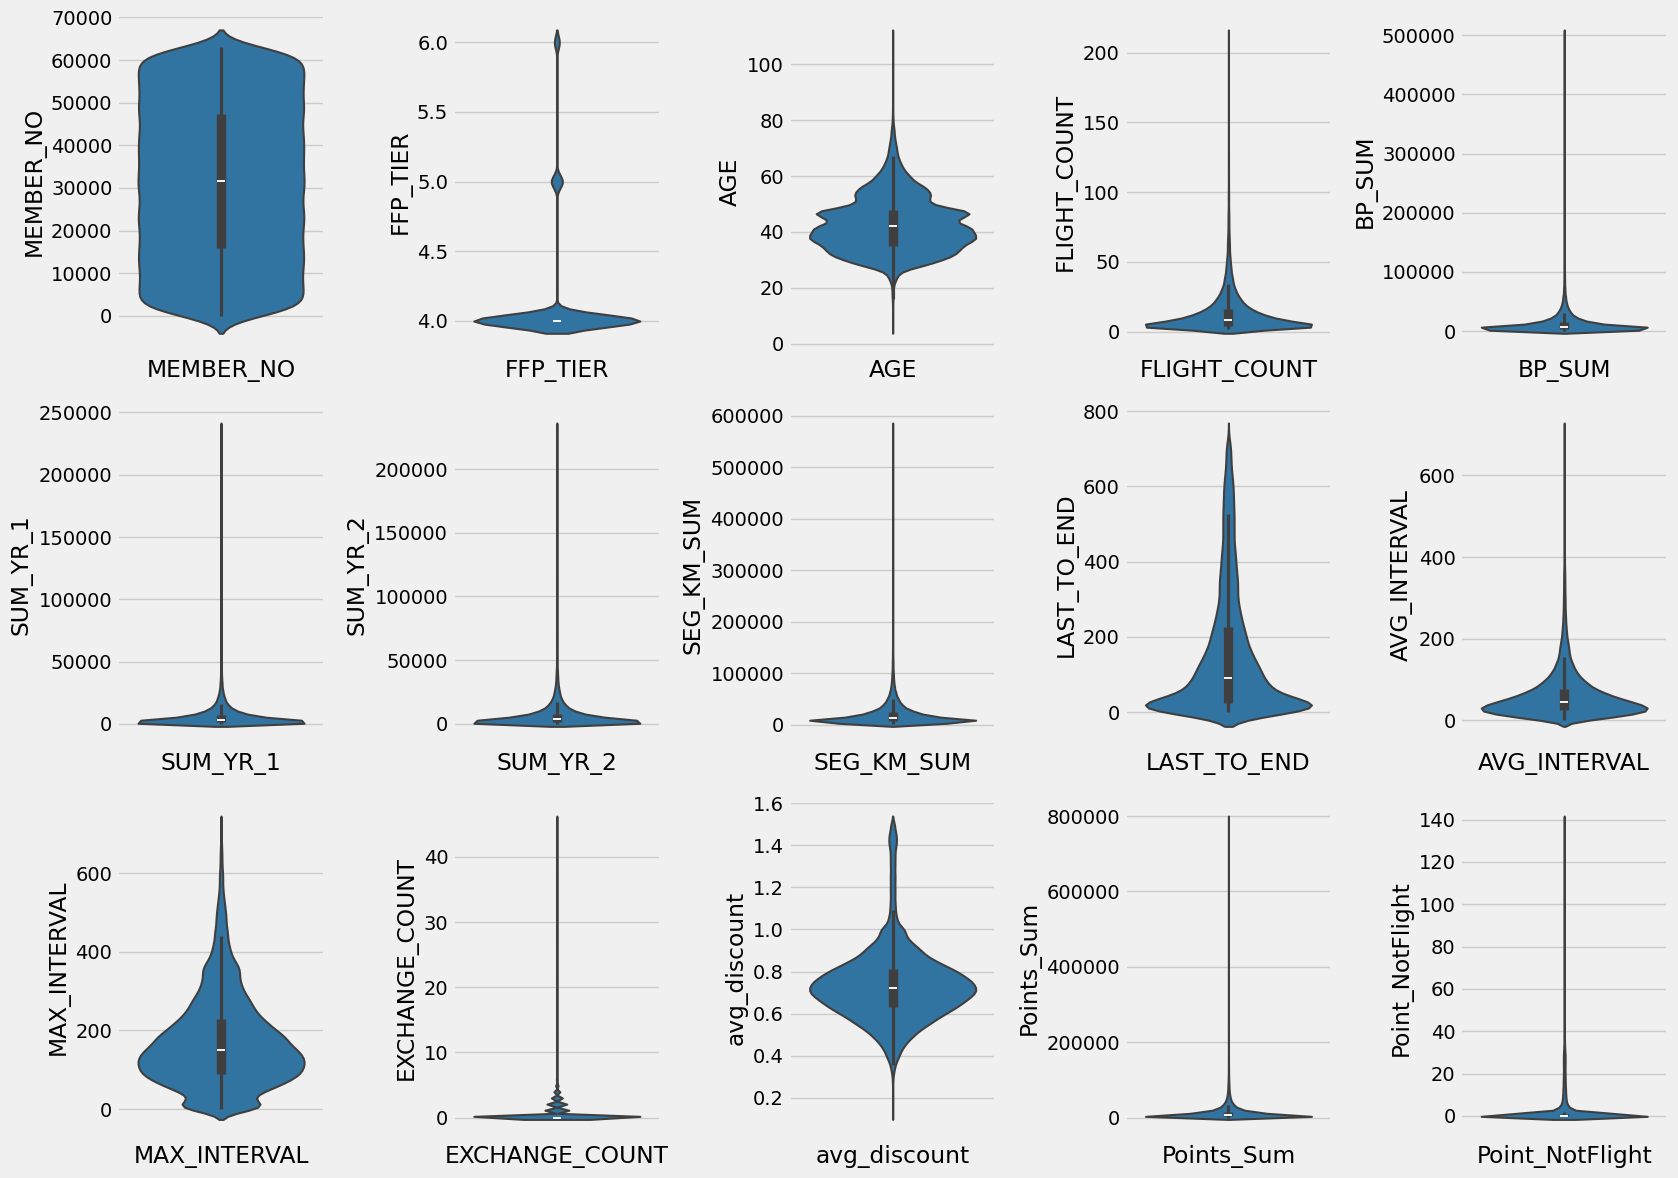

In [19]:
# Create violinplot for numeric feature

plt.figure(figsize=(17,12))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y=df[nums[i]], linewidth=1.5)
    plt.xlabel(nums[i])
    plt.tight_layout()

- There are many numeric columns with outliers and right-skewed distributions.
- Check the categorical feature `FFP_Tier` because it seems to have discrete values ranging from 4 to 6.

### 2. Distribution Plot

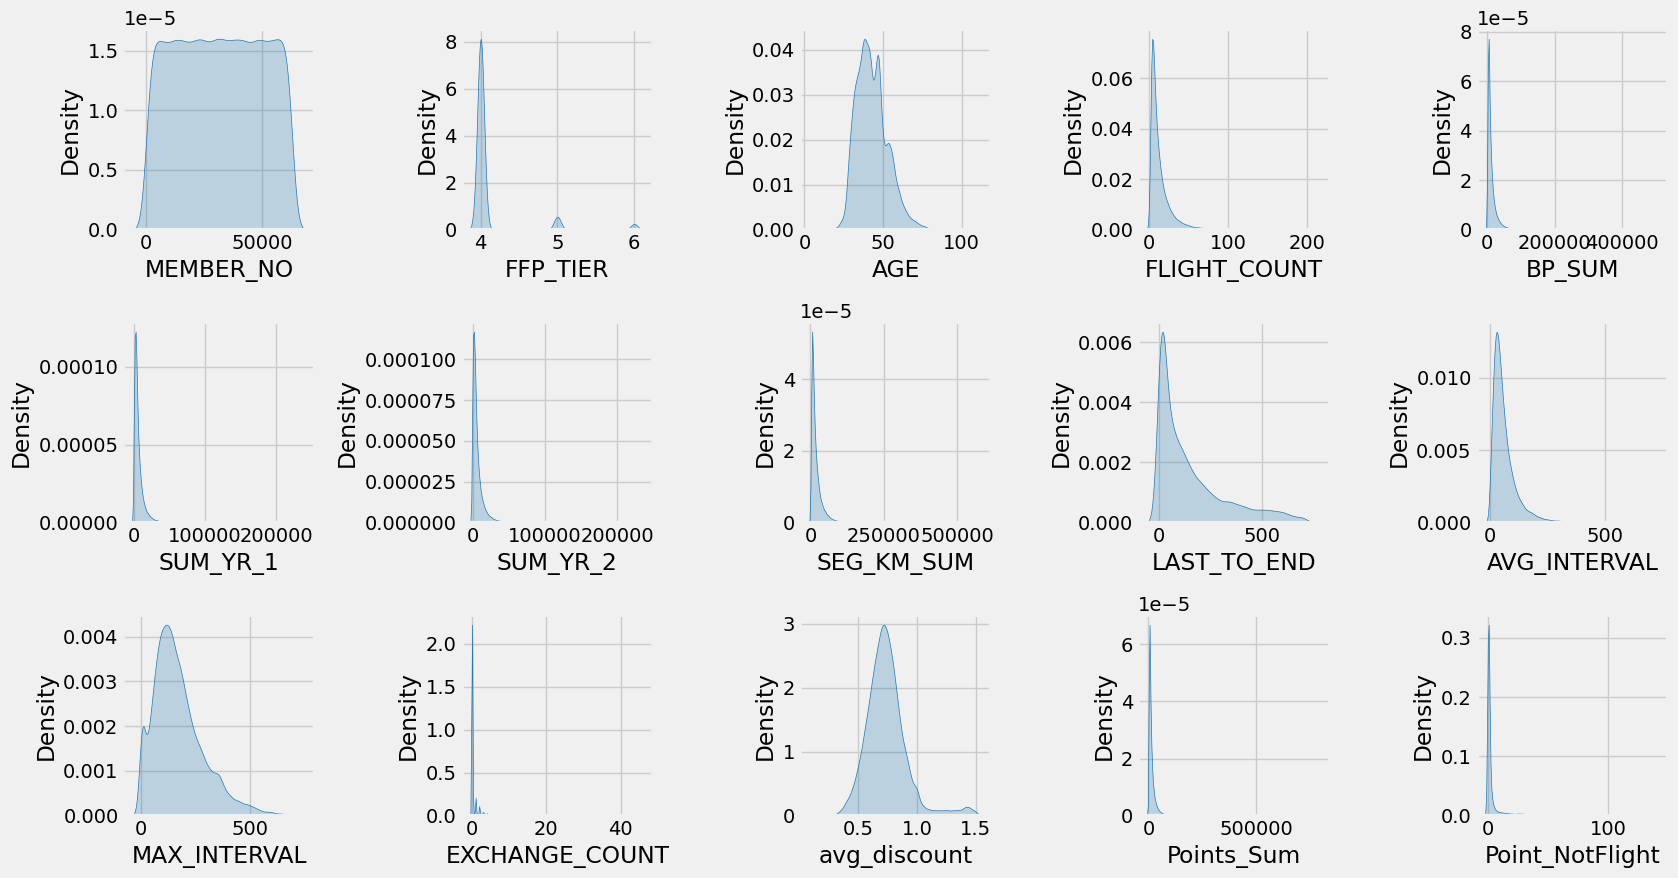

In [20]:
plt.figure(figsize=(17,9))
for i in range(0, len(nums)):
    plt.subplot(3,5, i+1)
    sns.kdeplot(data=df, x=df[nums[i]], fill='True')
    plt.tight_layout()

`avg_discount`has strange value (more than 1 or 100%)

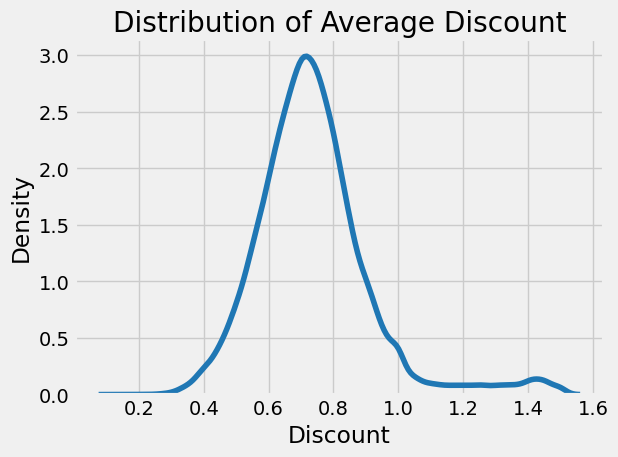

In [21]:
# See the KDE plot for the discount feature

ax = sns.kdeplot(x = df['avg_discount'])
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

It makes no sense that `avg_discount` has values more than 1 (100%)

In [22]:
# Remove rows with discounts greater than 100%

df = df[df['avg_discount']<=1]
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,52115.0,31565.098877,18185.290122,1.000000,15787.500000,31602.000000,47359.500000,62988.0
FFP_TIER,52115.0,4.093025,0.348380,4.000000,4.000000,4.000000,4.000000,6.0
AGE,51800.0,42.376544,9.675138,6.000000,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,52115.0,13.064761,14.242829,2.000000,4.000000,8.000000,16.000000,210.0
BP_SUM,52115.0,11404.482030,14556.431445,0.000000,3406.500000,6661.000000,13756.500000,505308.0
SUM_YR_1,51861.0,5596.679476,7353.586474,0.000000,1382.000000,3335.000000,7081.000000,239560.0
SUM_YR_2,52056.0,5907.412421,7992.930598,0.000000,1278.000000,3377.000000,7421.500000,234188.0
SEG_KM_SUM,52115.0,18950.567533,20984.072423,2006.000000,6351.000000,11913.000000,23426.500000,580717.0
LAST_TO_END,52115.0,155.955982,169.834457,1.000000,25.000000,92.000000,227.000000,730.0
AVG_INTERVAL,52115.0,62.925895,63.770708,0.000000,25.357143,44.812500,77.666667,713.0


New dataset with no discount more than 100%

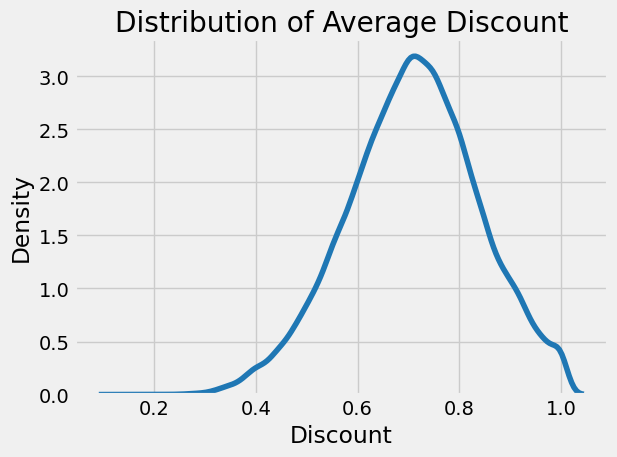

In [23]:
ax = sns.kdeplot(x = df['avg_discount'])
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

No discount > 100%

### 3. Countplot

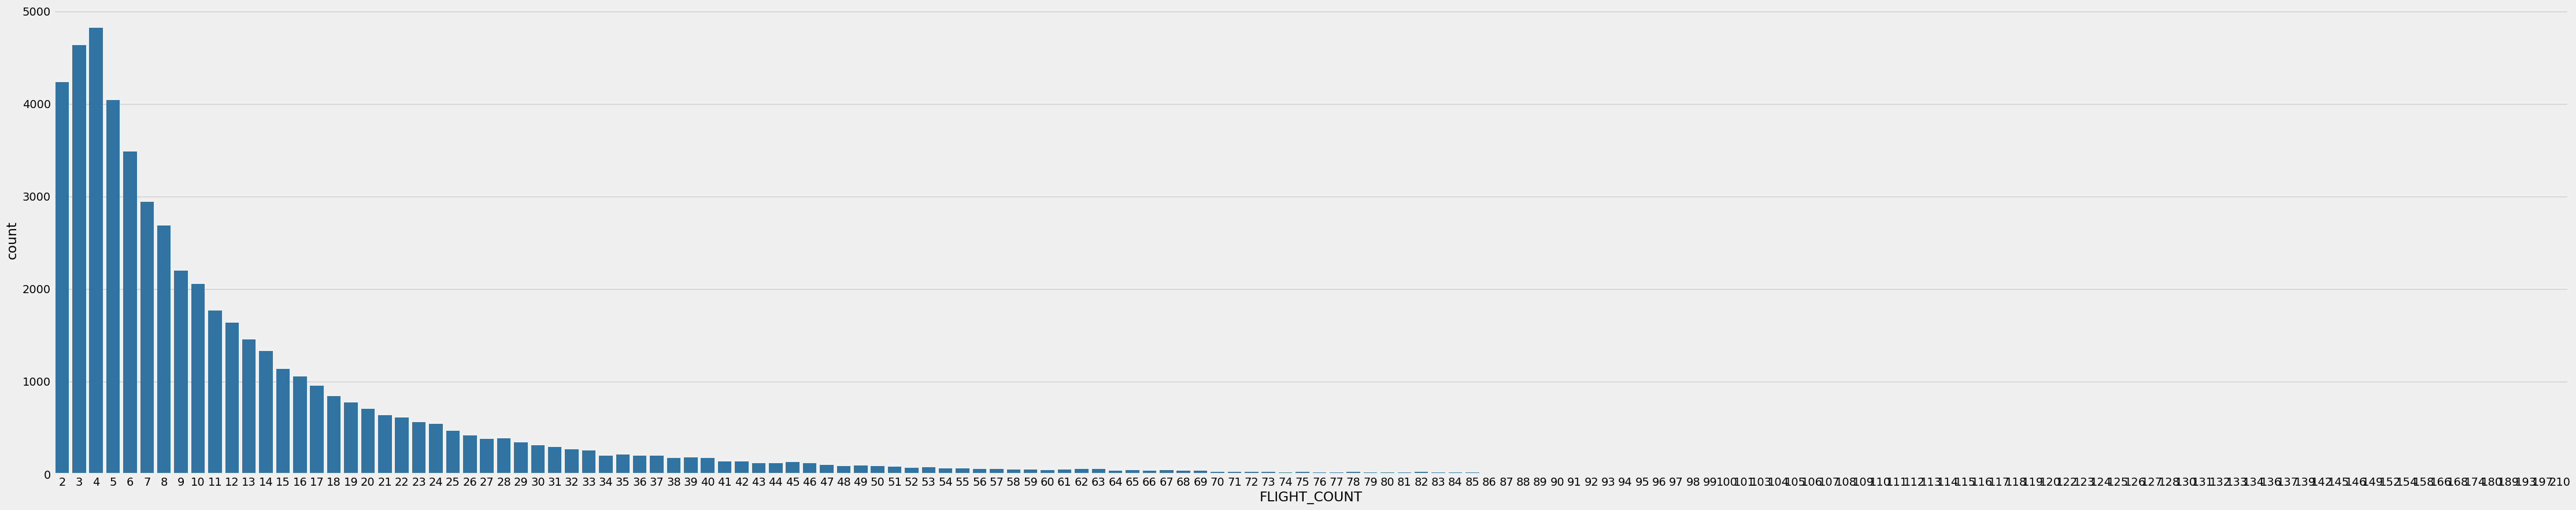

In [24]:
plt.figure(figsize=(50,10))
ax = sns.countplot(x=df["FLIGHT_COUNT"])

The number of flights per customer tends to be low; as the number of flights increases, the number of customers decreases

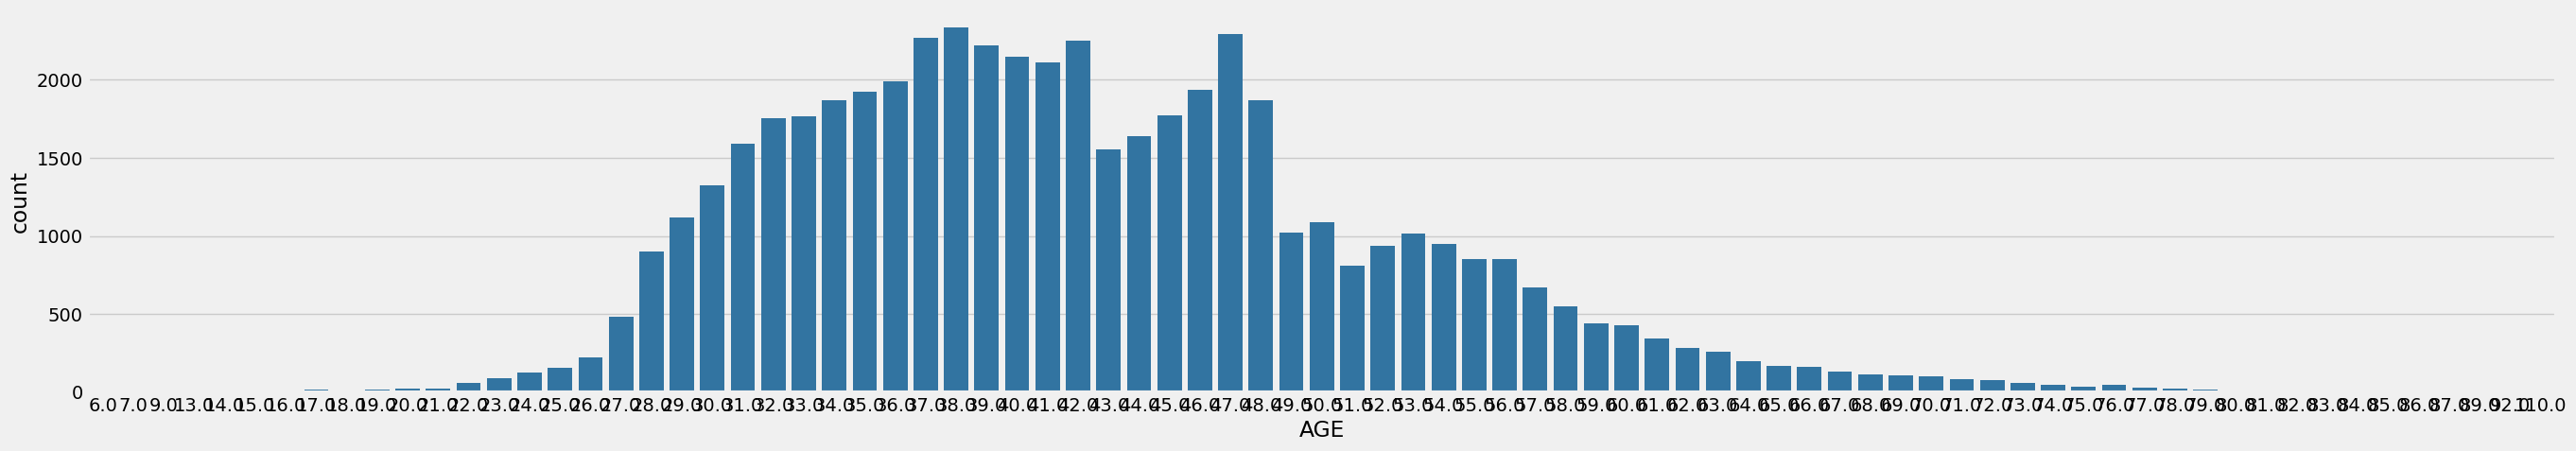

In [25]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x=df["AGE"])

Most customers are between the ages of 26 and 60.

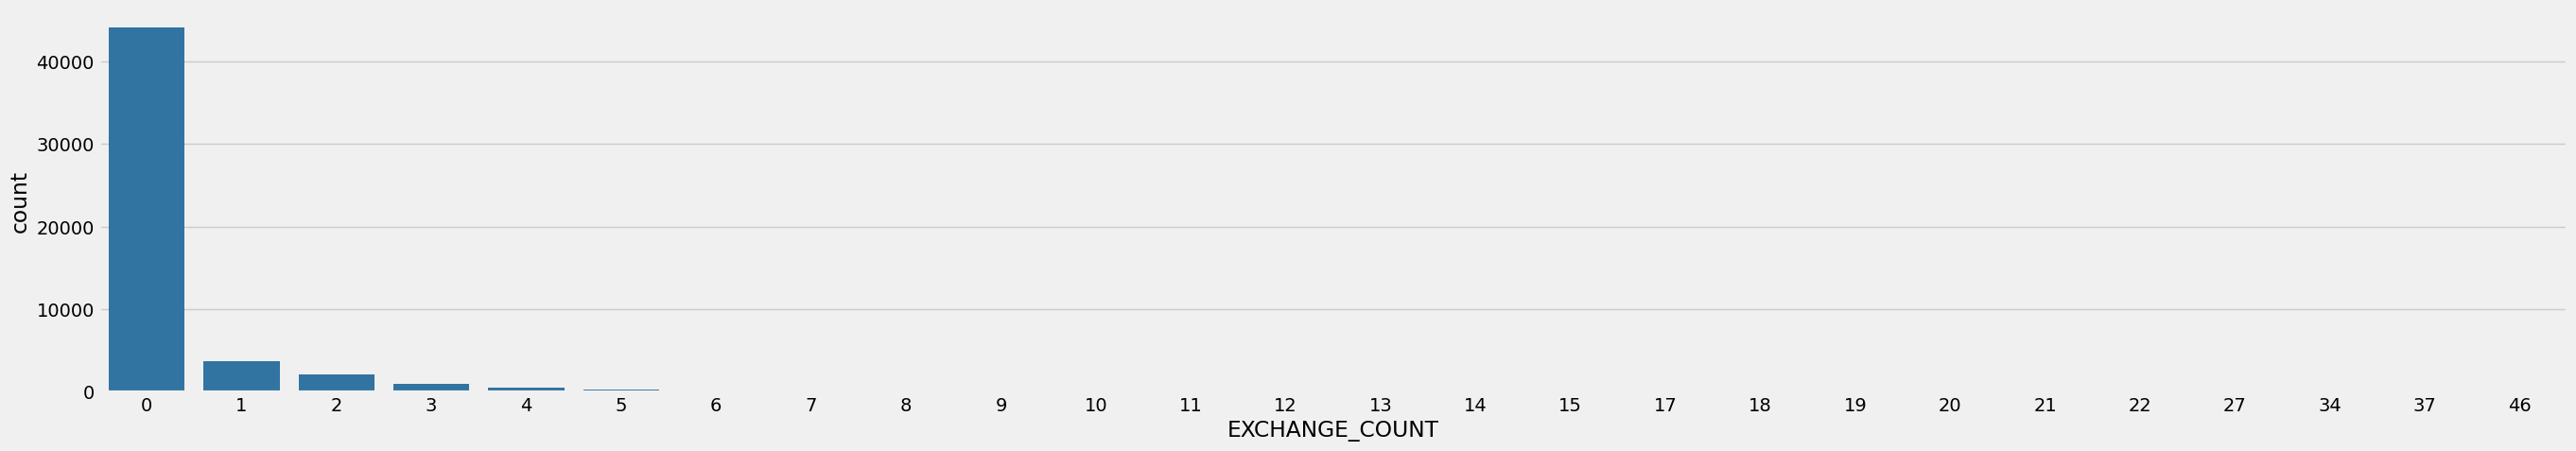

In [26]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x=df["EXCHANGE_COUNT"])

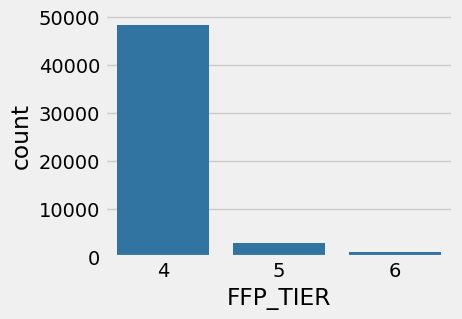

In [27]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x=df["FFP_TIER"])

The `FFP_TIER` feature is a categorical feature.

## Multivariat Analysis

### Heatmap Plot

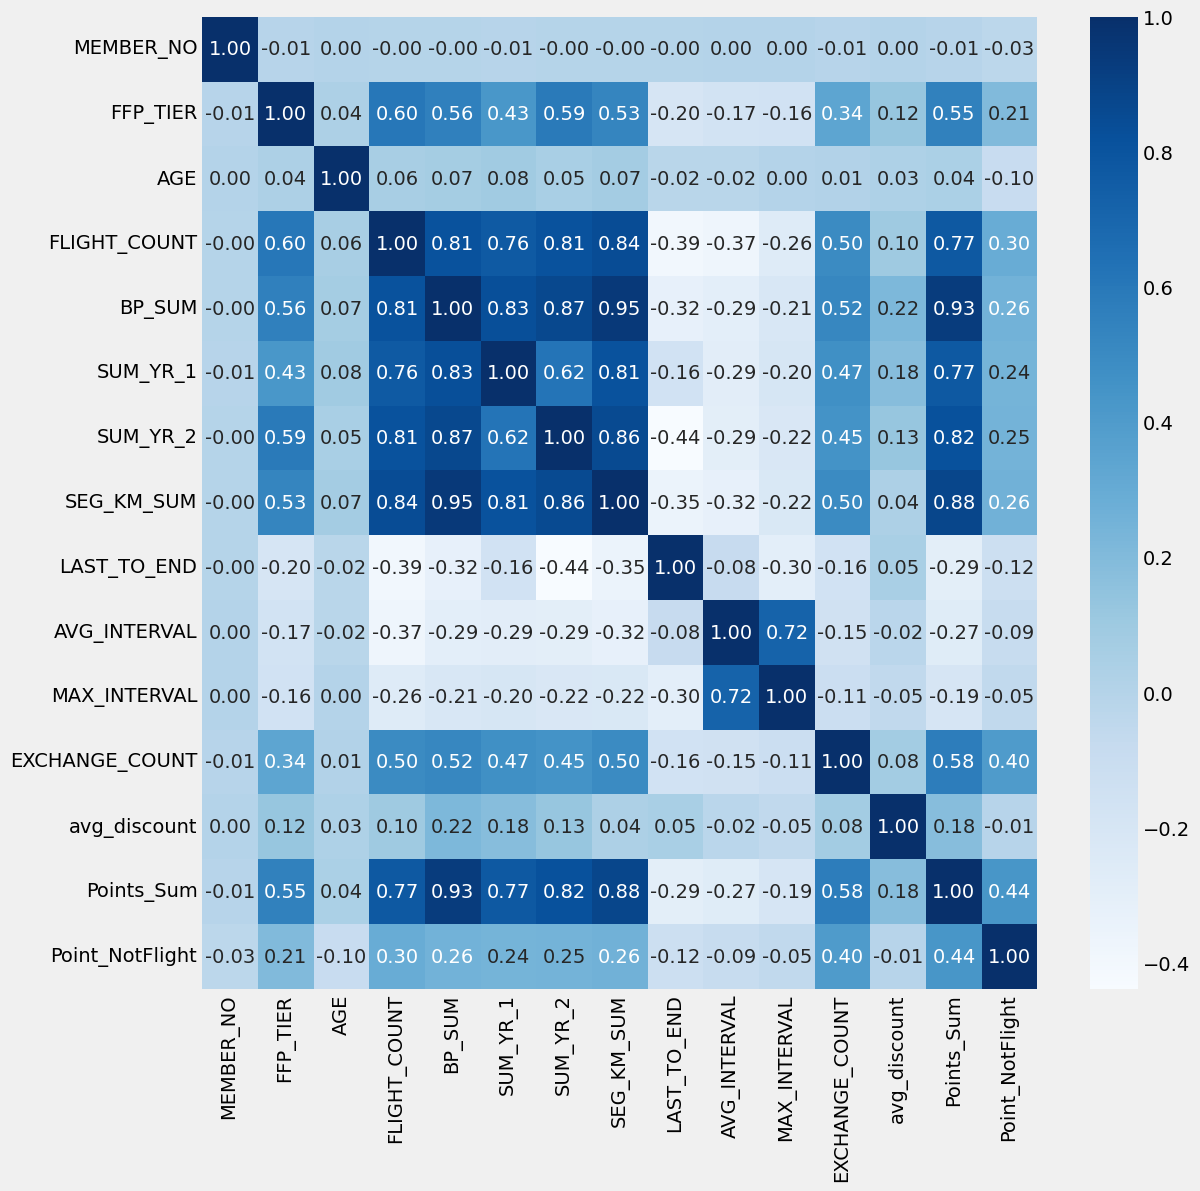

In [28]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Plot the heatmap with the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()


Some columns have high correlation each other (high multicolinearity)
- `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, and `Points_Sum` have high multicolinearity.
- `AVG_INTERVAL` dan `MAX_INTERVAL` have high multicolinearity.
- `AGE` has very low correlation with all features.

# Data Pre-Processing

## 1. Handling Missing Values

In [29]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  1
FFP_TIER                0
WORK_CITY            1804
WORK_PROVINCE        2565
WORK_COUNTRY           17
AGE                   315
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              254
SUM_YR_2               59
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [30]:
# missing values input at age features with median value

df['AGE'] = df['AGE'].fillna(df['AGE'].median())

In [31]:
# missing values iput at SUM_YR_1 dan SUM_YR_2 with 0 value

df['SUM_YR_1'] = df['SUM_YR_1'].fillna(0)
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(0)

`WORK_CITY`, `WORK_PROVINCE`, and`WORK_COUNTRY` will be dropped because too many unique values and considered as categorical 

In [32]:
# drop column work_city, work_province, work_country

df = df.drop(['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

In [33]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

No missing values found.

## 2. Feature Engineering

change datatype of feature `FFP_DATE`, `FFP_FLIGHT_DATE`, `LAST_FLIGHT_DATE`, `LAST_TO_END` to datetime datatype.

In [34]:
# change to datetime

df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'], errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52115 entries, 0 to 54999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          52115 non-null  int64         
 1   FFP_DATE           52115 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  52115 non-null  datetime64[ns]
 3   FFP_TIER           52115 non-null  int64         
 4   AGE                52115 non-null  float64       
 5   LOAD_TIME          52115 non-null  datetime64[ns]
 6   FLIGHT_COUNT       52115 non-null  int64         
 7   BP_SUM             52115 non-null  int64         
 8   SUM_YR_1           52115 non-null  float64       
 9   SUM_YR_2           52115 non-null  float64       
 10  SEG_KM_SUM         52115 non-null  int64         
 11  LAST_FLIGHT_DATE   51735 non-null  datetime64[ns]
 12  LAST_TO_END        52115 non-null  int64         
 13  AVG_INTERVAL       52115 non-null  float64       
 14  MAX_INTERVA

## 3. Outlier Handling

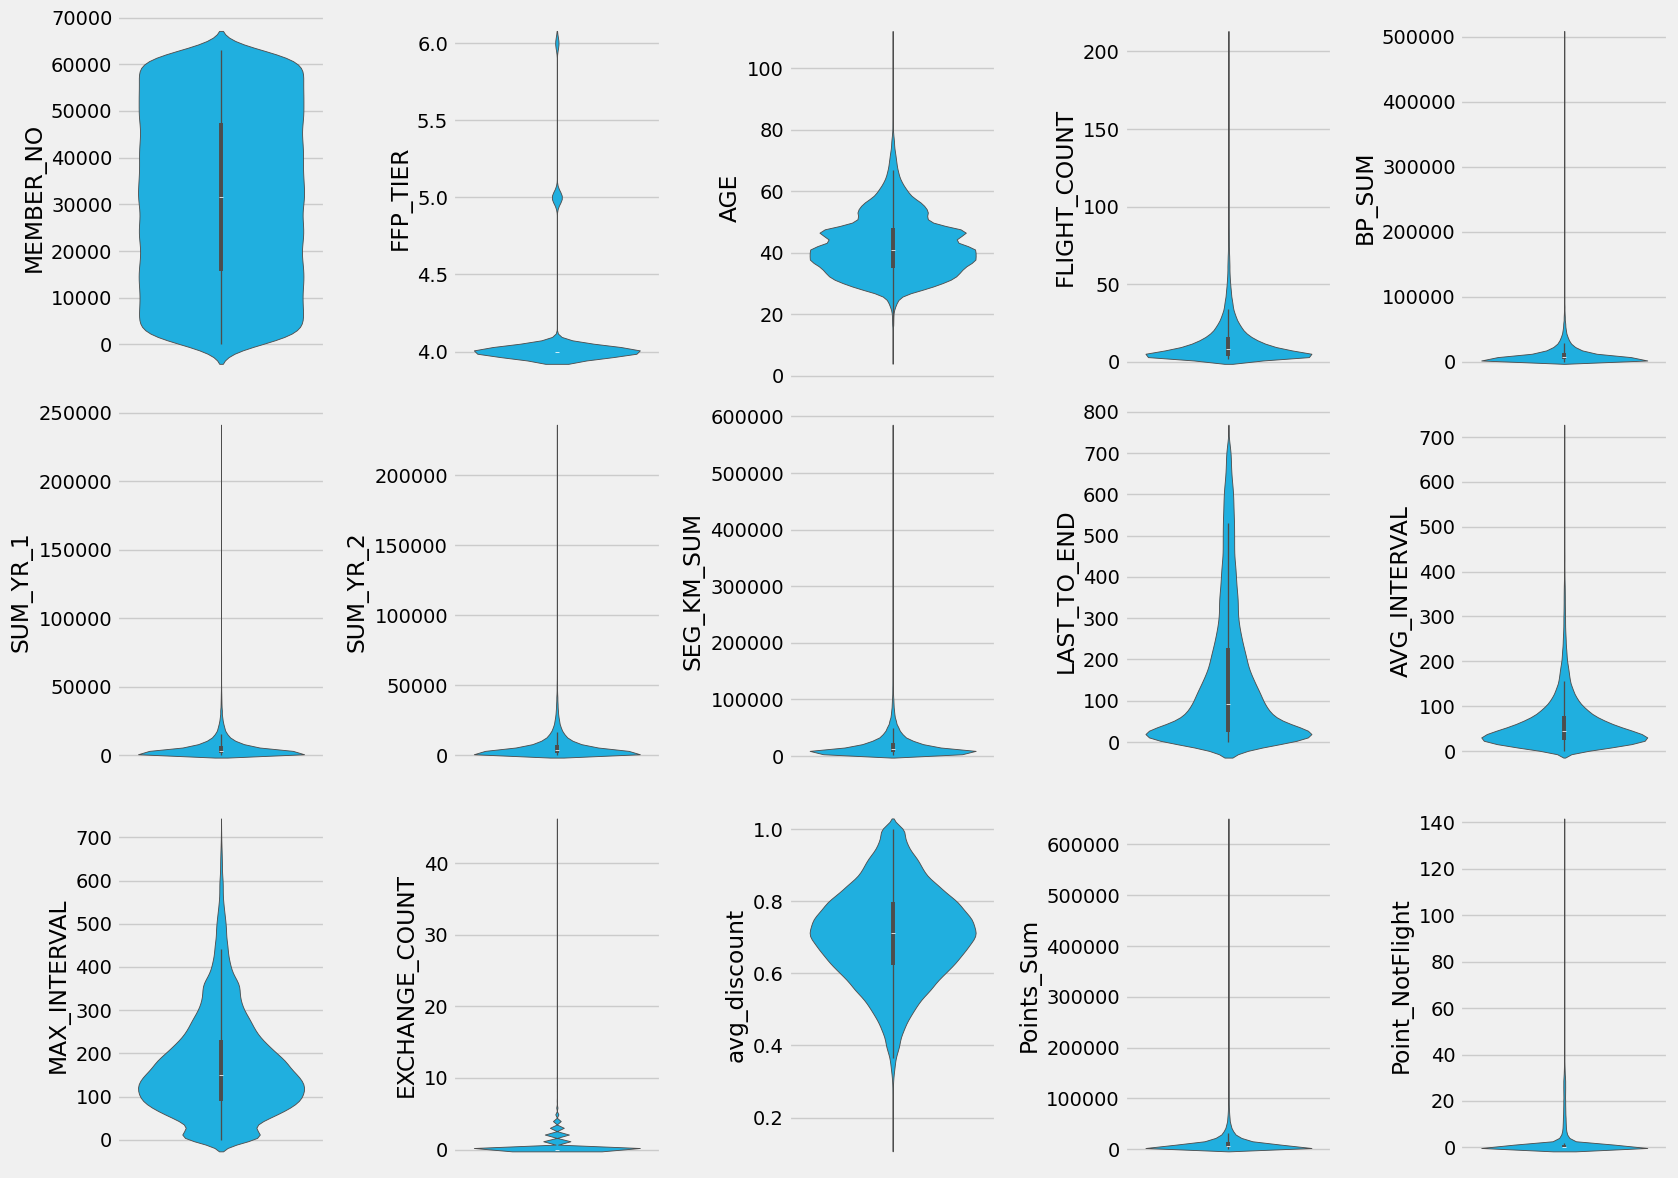

In [36]:
# boxplot

plt.figure(figsize = (17,12))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y = df[nums[i]], orient='v', color = 'deepskyblue')
    plt.tight_layout()

Drop outlier with z-score method

In [37]:
from scipy import stats
import numpy as np

# Handling Outlier using Z-score

print(f'Total Rows BEFORE Outlier Handling = {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries 
    
df = df[filtered_entries] 

print(f'Total Rows AFTER Outlier Handling = {len(df)}')

Total Rows BEFORE Outlier Handling = 52115
Total Rows AFTER Outlier Handling = 45289


## 4. Feature Selection

LRFMC analysis is an extended version of RFM analysis that has been used in the aviation industry for years to divide customers into segments. Based on LRFMC analysis we will need 5 variables:

- L (Length of joining member) : The number of months since the member’s joining time from the end of the observation time. => LOAD_TIME - FFP_DATE

- R (Recent flight) : Number of months since the member’s last flight from the end of observation time. => LAST_TO_END

- F (Flight Count) : The total number of times the member has flown during the observation period. => FLIGHT_COUNT

- M (Miles Accumulated) : Miles accumulated during member observation time. => SEG_KM_SUM

- C (Discount Used) : The average value of the discount factor used by the member during the observation period. => avg_discount

In [38]:
# create new feature

df['L'] = df['LOAD_TIME'] - df['FFP_DATE']
df['R'] = df['LAST_TO_END']
df['F'] = df['FLIGHT_COUNT']
df['M'] = df['SEG_KM_SUM']
df['C'] = df['avg_discount']

In [39]:
# Select only features L, R, F, M, C

df_cust = df[['L', 'R', 'F', 'M', 'C']]
df_cust

,L,R,F,M,C
1314,2997 days,4,46,81221,0.779040
1385,576 days,1,51,81466,0.757720
1445,2894 days,7,45,72869,0.831767
1483,948 days,9,54,70492,0.849685
1486,1561 days,41,18,76005,0.786950
...,...,...,...,...,...
54995,426 days,368,2,3453,0.580828
54996,1963 days,387,2,3820,0.525000
54997,1067 days,570,2,4222,0.475000
54998,1382 days,22,4,2596,0.772500


In [40]:
# check dytpes

df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45289 entries, 1314 to 54999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   L       45289 non-null  timedelta64[ns]
 1   R       45289 non-null  int64          
 2   F       45289 non-null  int64          
 3   M       45289 non-null  int64          
 4   C       45289 non-null  float64        
dtypes: float64(1), int64(3), timedelta64[ns](1)
memory usage: 2.1 MB


In [41]:
# change dataype of L to integer (timedelta -> str -> int)

df_cust['L'] = df_cust['L'].astype(str)

In [42]:
df_cust['L'] = df_cust['L'].str.split().str[0]

In [43]:
df_cust['L'] = df_cust['L'].astype(int)

In [44]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45289 entries, 1314 to 54999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L       45289 non-null  int32  
 1   R       45289 non-null  int64  
 2   F       45289 non-null  int64  
 3   M       45289 non-null  int64  
 4   C       45289 non-null  float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 1.9 MB


## 5. Standardization

In [45]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
custvalue_std = std.fit_transform(df_cust)
custvalue_std

array([[ 1.8286878 , -0.94316282,  3.74321096,  4.95712266,  0.57483702],
       [-1.06006302, -0.96134021,  4.27948017,  4.9757169 ,  0.40890448],
       [ 1.70578762, -0.92498542,  3.63595712,  4.32324912,  0.98522549],
       ...,
       [-0.47419905,  2.48630553, -0.9759581 , -0.88670261, -1.7915577 ],
       [-0.09833928, -0.83409845, -0.76145042, -1.01010759,  0.5239377 ],
       [ 0.5543442 ,  1.52896278, -0.86870426, -1.048055  ,  1.95743864]])

In [46]:
dfcust_std = pd.DataFrame(custvalue_std, columns = df_cust.columns)
dfcust_std.head()

,L,R,F,M,C
0,1.828688,-0.943163,3.743211,4.957123,0.574837
1,-1.060063,-0.961340,4.279480,4.975717,0.408904
2,1.705788,-0.924985,3.635957,4.323249,0.985225
3,-0.616191,-0.912867,4.601242,4.142847,1.124683
4,0.115245,-0.718975,0.740103,4.561255,0.636401


# CLUSTERING: K-MEANS

In [47]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(dfcust_std)
    inertia.append(kmeans.inertia_)

<Axes: >

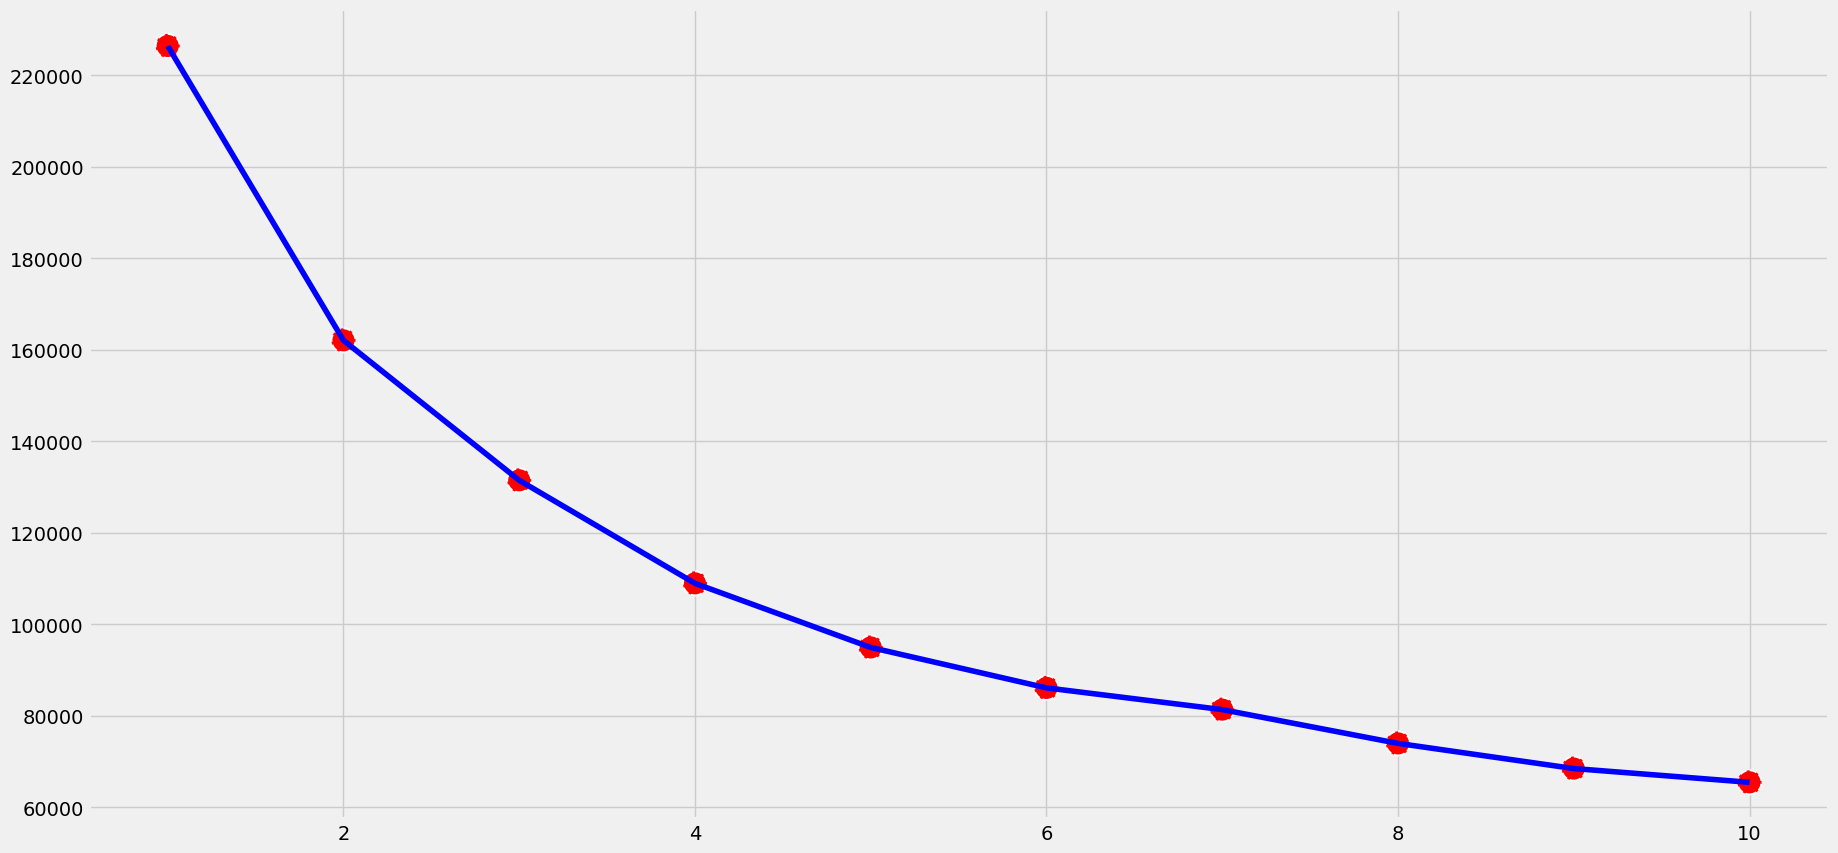

In [48]:
# See the inertia plot to determine the number of clusters

plt.figure(figsize=(20,10))

sns.lineplot(x=range(1,11), y = inertia, color = 'blue', linewidth = 4)
sns.scatterplot(x=range(1,11), y = inertia, s = 300, color = 'red', linestyle = '--')

Select n_cluster = 4

In [49]:
# cluster n=4
kmeans = KMeans(n_clusters = 4, random_state = 0)

# fit model
kc = kmeans.fit(dfcust_std)
cluster_labels = kc.labels_

# add cluster
datacust_cluster = dfcust_std.assign(K_Cluster = cluster_labels)
datacust_cluster.head()

,L,R,F,M,C,K_Cluster
0,1.828688,-0.943163,3.743211,4.957123,0.574837,3
1,-1.060063,-0.961340,4.279480,4.975717,0.408904,3
2,1.705788,-0.924985,3.635957,4.323249,0.985225,3
3,-0.616191,-0.912867,4.601242,4.142847,1.124683,3
4,0.115245,-0.718975,0.740103,4.561255,0.636401,3


In [50]:
# add cluster to df_cust
cust_cluster = df_cust.assign(K_Cluster = cluster_labels)
cust_cluster.head()

,L,R,F,M,C,K_Cluster
1314,2997,4,46,81221,0.779040,3
1385,576,1,51,81466,0.757720,3
1445,2894,7,45,72869,0.831767,3
1483,948,9,54,70492,0.849685,3
1486,1561,41,18,76005,0.786950,3


## PCA

In [51]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(datacust_cluster)
pcs = pca.transform(datacust_cluster)

In [52]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = datacust_cluster['K_Cluster']
data_pca.sample(10, random_state=123)

,PC 1,PC 2,cluster
42776,-0.051135,-2.701487,2
36775,-2.665423,0.468685,0
11858,1.017837,-0.583751,2
2475,3.183697,0.050380,3
23186,0.276832,-0.058441,2
22941,-0.357032,0.882672,1
36515,-1.514413,2.418521,1
35268,-0.277204,-1.522490,2
22431,-0.180830,-0.993303,2
8782,1.031484,1.670667,1


<Axes: xlabel='PC 1', ylabel='PC 2'>

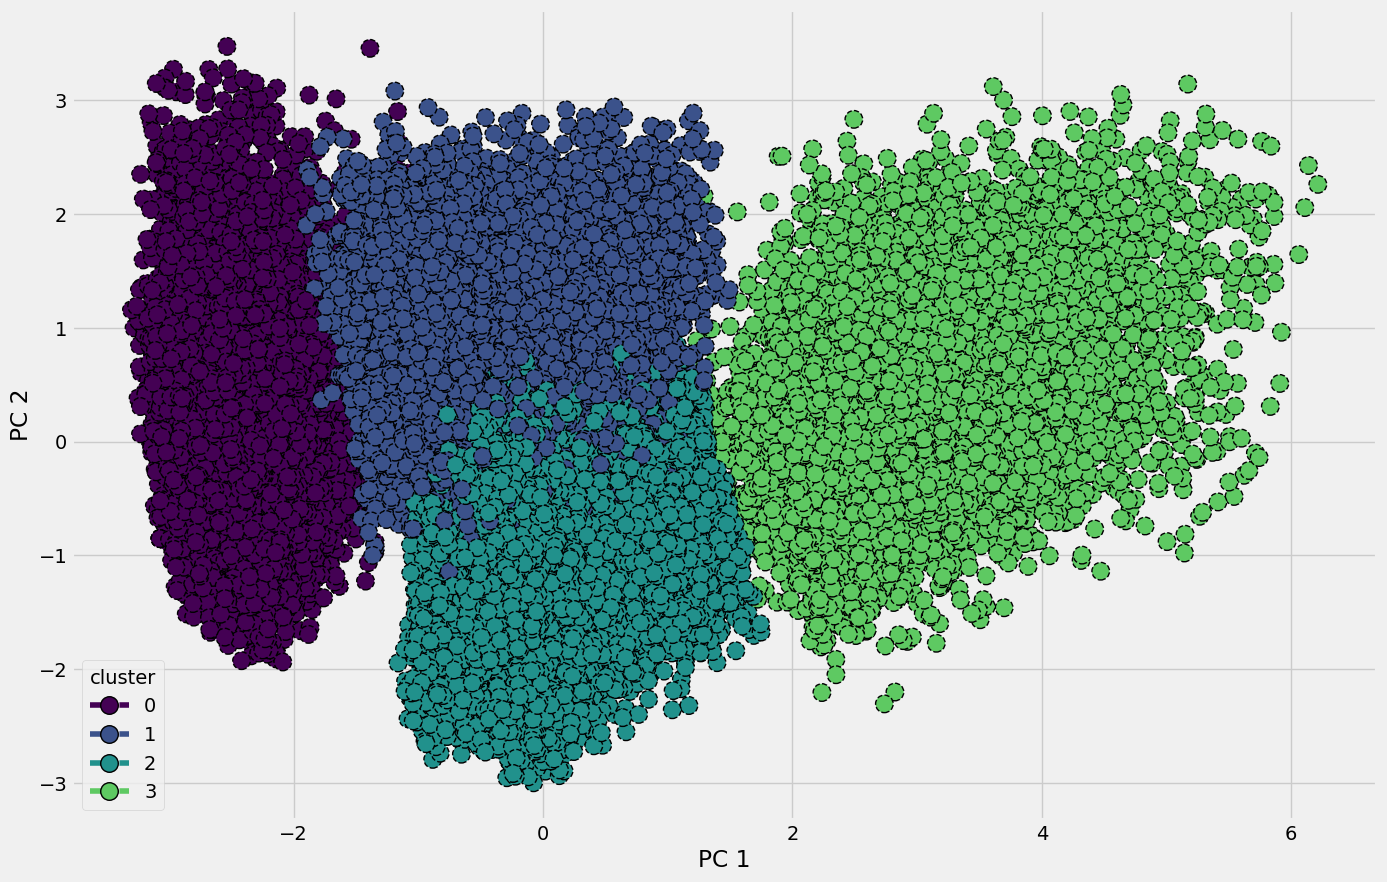

In [53]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['#440154','#3b528b','#21918c','#5ec962'],
    s=160,
    ax=ax
)

# Model Analysis

## A. Distribution

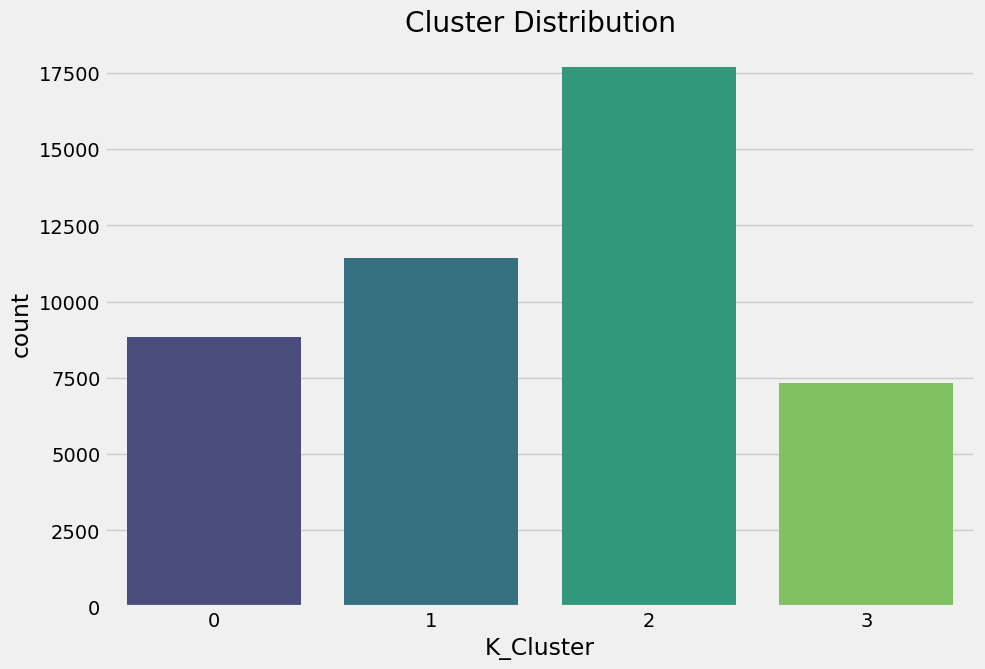

In [54]:
plt.figure(figsize=(10,7))
pl = sns.countplot(x = cust_cluster['K_Cluster'], palette='viridis')
pl.set_title('Cluster Distribution')
plt.show()

## B. LRFMC

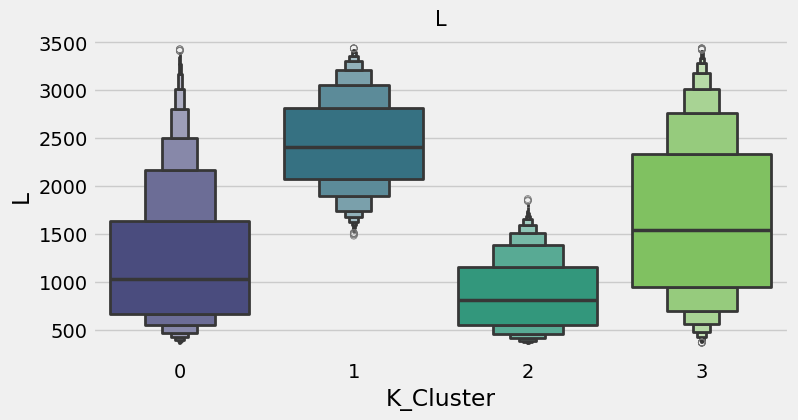

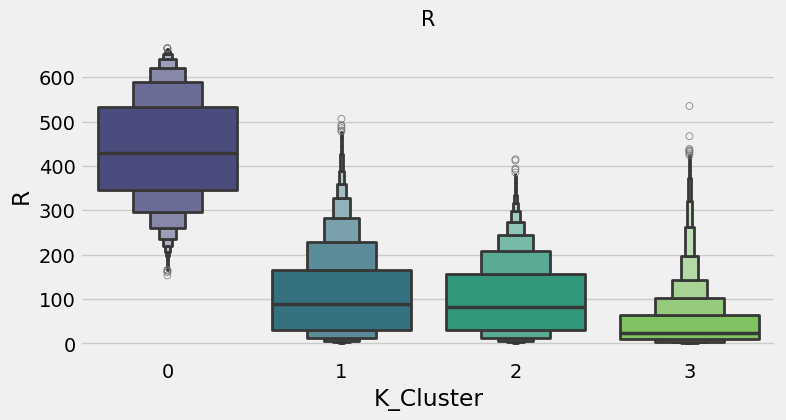

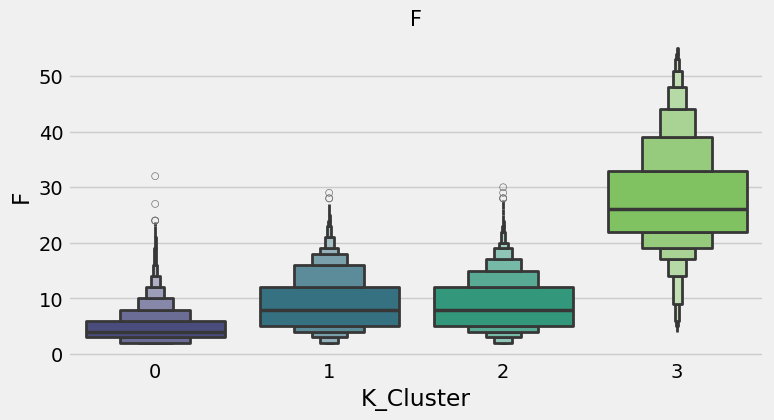

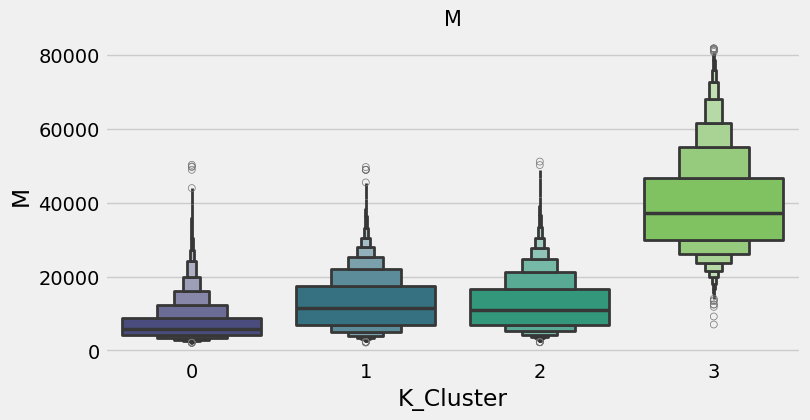

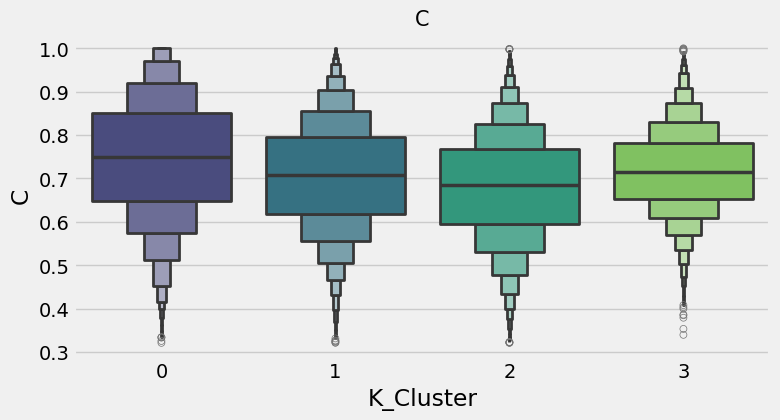

In [67]:
for i in df_cust.columns:
  plt.figure(figsize=(8,4))
  pl = sns.boxenplot(x = cust_cluster['K_Cluster'], y = cust_cluster[i], palette='viridis')
  pl.set_title(i, fontsize=15)
plt.show()

In [56]:
cust_cluster.sample(10)

,L,R,F,M,C,K_Cluster
28430,2551,80,10,15265,0.527420,1
32283,552,127,6,7802,0.860905,2
19134,2893,27,14,17146,0.745495,1
41111,2153,60,9,5392,0.817949,1
35376,2095,94,8,8775,0.662211,1
45264,2923,359,3,4733,0.756117,1
23149,2843,122,7,11864,0.883216,1
43268,387,236,3,5528,0.713873,2
7047,1488,94,24,40454,0.684480,3
23283,811,178,13,11466,0.907420,2


In [57]:
# create pivot table K-Cluster aggregation

pivot_cc =  cust_cluster.groupby('K_Cluster').agg({'L': ['mean','median'],
                                                     'R': ['mean','median'],
                                                     'F': ['mean','median'],
                                                     'M': ['mean','median'],
                                                     'C': ['mean','median']}).reset_index()

In [58]:
pivot_cc

K_Cluster            L                   R                 F         \
                    mean  median        mean median       mean median   
0         0  1226.965365  1026.0  437.805546  430.0   4.640634    4.0   
1         1  2442.083494  2403.0  110.165674   88.0   9.055809    8.0   
2         2   872.355719   812.0   99.889353   81.0   8.712115    8.0   
3         3  1658.173142  1546.0   45.923108   24.0  27.822086   26.0   

              M                  C            
           mean   median      mean    median  
0   7281.605772   5684.0  0.745310  0.750000  
1  12809.192132  11360.5  0.705410  0.708438  
2  12477.694663  10933.0  0.679977  0.685221  
3  39383.890252  37107.0  0.717340  0.714910


`Cluster 0:`

Days Since Join (L): Moderate (mean: 1226.97 days, median: 1026.0 days).   
Flight Recency (R): Moderate (mean: 437.81 days, median: 430.0 days).   
Flight Count (F): High (mean: 4.64 flights, median: 4.0 flights).   
Flight Distance (M): Moderate (mean: 7281.61 km, median: 5684.0 km).   
Discount (C): High (mean: 0.75, median: 0.75).

`Cluster 1:`

Days Since Join (L): Longest (mean: 2442.08 days, median: 2403.0 days).   
Flight Recency (R): Moderate (mean: 110.17 days, median: 88.0 days).   
Flight Count (F): High (mean: 9.06 flights, median: 8.0 flights).   
Flight Distance (M): High (mean: 12809.19 km, median: 11360.5 km).   
Discount (C): Moderate (mean: 0.71, median: 0.71).

`Cluster 2:`

Days Since Join (L): Shortest (mean: 872.36 days, median: 812.0 days).   
Flight Recency (R): Long (mean: 99.89 days, median: 81.0 days).   
Flight Count (F): Moderate (mean: 8.71 flights, median: 8.0 flights).   
Flight Distance (M): Moderate (mean: 12477.69 km, median: 10933.0 km).   
Discount (C): Lower (mean: 0.68, median: 0.69).

`Cluster 3:`

Days Since Join (L): Long (mean: 1658.17 days, median: 1546.0 days).   
Flight Recency (R): Short (mean: 45.92 days, median: 24.0 days).   
Flight Count (F): Low (mean: 27.82 flights, median: 26.0 flights).   
Flight Distance (M): Highest (mean: 39383.89 km, median: 37107.0 km).   
Discount (C): Moderate (mean: 0.72, median: 0.71)

## Key Takeaway


`Discount Usage:`

The average discount usage across all clusters is relatively consistent, ranging from 68% to 75%. This suggests that discounts are a standard practice applied similarly across clusters.


`Cluster 3:`

Most Senior Cluster: With an average of 1658 days since joining, Cluster 3 members are the most senior. This cluster shows a high level of engagement with long-term loyalty.

High Flight Distance: Members in this cluster have the highest average flight distance (39,383.89 km), indicating frequent long-distance travel.

Moderate Flight Count: Despite the high flight distance, the flight count is moderate (45.92 flights), reflecting less frequent but significant travel.


`Cluster 1:`

High Engagement: Cluster 1 members exhibit strong loyalty with the highest average flight count (110.17) and flight distance (12,809.19 km). This cluster is characterized by high engagement and frequent travel.

Senior Status: Although not as senior as Cluster 3, Cluster 1 members have a substantial average membership duration (2442.08 days).


`Cluster 2:`

Newer and Less Active: Cluster 2 is the newest cluster with the shortest average membership duration (872.36 days). Members in this cluster show lower flight count (8.71 flights) and distance (12,477.69 km), with longer flight recency (99.89 days).

Opportunity for Growth: Cluster 2 has potential for increased engagement. Targeting this cluster with specific promotions and incentives could help convert them into more loyal customers.


`Cluster 0:`

Balanced Characteristics: Cluster 0 members have moderate values across most features, including flight count (4.64 flights) and flight distance (7,281.61 km). They show a balanced recency (437.81 days) and membership duration (1226.97 days).

Effective Discount Use: This cluster has a high average discount (75%), indicating effective use of discounts to maintain customer engagement.

## Business Recommendation

### 1. Tailor Loyalty Programs:

Gold: Assign Cluster 0 as Gold members. They exhibit balanced engagement and frequent moderate-distance travel. Offer personalized rewards for consistent usage, such as additional discounts or exclusive benefits for frequent travelers.

Silver: Assign Clusters 1 and 3 as Silver members. Cluster 1, with high engagement and frequent travel, should receive benefits that emphasize their high activity, such as priority boarding or premium services. Cluster 3, despite being less frequent, should be valued for their long-term loyalty with benefits like anniversary rewards or special offers for long-distance travel.

Bronze: Assign Cluster 2 as Bronze members. Provide targeted incentives to increase their engagement, such as introductory offers or limited-time discounts, to encourage more frequent travel and longer-term membership.


### 2. Prevent Churn for Cluster 2:

Engagement Campaigns: Since Cluster 2 has long flight recency and lower activity, implement campaigns to re-engage them. Use personalized push notifications and special promotions to encourage bookings and prevent them from becoming inactive.

Special Offers: Offer attractive discounts or deals specifically for Cluster 2 members when they make a booking, to incentivize them to return to active travel.

### 3. Increase Engagement for Cluster 2:

Incentives for Activity: Introduce rewards for frequent bookings to motivate Cluster 2 members to travel more often. Consider loyalty points or tiered rewards that increase with the number of flights.

Personalized Communication: Use data insights to send tailored offers and promotions that match their past behavior and preferences. Engage them with targeted email campaigns and special promotions.

### 4. Enhance Benefits for Cluster 1 and 3:

Cluster 1: With high flight count and engagement, offer perks such as additional miles, exclusive access to lounges, or priority services to reinforce their loyalty and encourage continued engagement.

Cluster 3: Focus on long-term benefits and exclusive rewards that acknowledge their senior status, such as special anniversary offers or enhanced benefits for their travel frequency and distance.

### 5. Optimize Discount Strategies:

Across All Clusters: Although discount usage is consistent, ensure that the discount strategies are optimized for each cluster's characteristics. Tailor discounts to align with the clusters’ flight recency, count, and distance to maximize their effectiveness.

### 6. Monitor and Adjust:

Regular Analysis: Continuously monitor the performance of loyalty programs and engagement strategies. Adjust based on changes in customer behavior and cluster dynamics to ensure ongoing relevance and effectiveness.